<a href="https://www.kaggle.com/code/viniciusnalasantos/housepricesalgoritm?scriptVersionId=120238731" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.1]

![head.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*SKMv5WG1awobyKkTacXJdQ.png)

Linear Regression occupies a good part of Data Science area, learn how to build models based on linear regression techniques today - is essential. Although Linear Regressions Models are relatively simple, they can be used to solve many problems with great accuracy.

Not only it's used in Data Science but also is used in many fields, from business and financial sectors to biology and science. In conclusion, it can be used for a myriad of things.
 
In this series of articles, I will elucidate the concept of linear regression through the [Kaggle Competition: "House Prices - Advanced Regression Techniques"](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques), starting first with the basic linear regression equation, and going to complex analysis, showing in the second part of this article, the most common regressors models. Also, in the meanwhile, I will explain ways to deal with categorical variables and teach how to use a pipeline to preprocess them.

### Table of Contents

[Part One](#part_one)
* [Classification Models x Regression Models](#classification_regression)
* [Linear Regression Equation](#equation)
* [General Characteristics of the Dataset](#general)
* [Target Variable Behavior](#target_variable_behavior)
* [Missing Values Overview](#missing_values_overview)
* [Divide Qualitative and Quantitative Variables](#divide_qualitative_quantitative)
    - [Quantitative Analysis](#quantitative)
    - [Qualitative Analysis](#qualitative)
        - [Ordinal Encoding](#ordinal_encoding)
        - [One Hot Encoding](#one_hot_encoding)
* [Prepare the Dataset](#prepare_dataset)
    - [Transformation](#transformation)
* [Conclusion](#conclusion)

[Part Two](#part_two) (coming soon...)

<a id="part_one"></a>
<h2><b> Part One </b></h2>

---

#### Code from the article: [Linear Regression: Advanced Modeling Techniques & Pipeline [Pt.1]]()

<a id="classification_regression"></a>
## Classification Models x Regression Models

First of all, I would like to distinguish Classification Models from Regression Models, which have a key difference: the first one is used to predict discrete values, while the other predicts quantities.

For instance, in my [last article](https://medium.com/@viniciusnala/machine-learning-model-to-predict-survival-in-titanic-pt-1-b3681d1794fb), I built a classification model to predict if a person would survive or not on Titanic. In this case, we try to predict two values: 0 and 1 (Survived or Not Survived), so it's a classification algorithm. In this article, I will build a model that predicts the sale price of a house according to the data provided by Kaggle. So it's a regression algorithm, which predicts a quantity - in this case, the sale price of a house but could be the salary, age, etc.

<a id="equation"></a>
## Linear Regression Equation

The Linear Regression Equation describes the linear relationship between the independent variables and dependent variables. Below you can see the equation:

![image.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*k2bLmeYIG7z7dCyxADedhQ.png)

Least squares regression produces a linear regression equation, this procedure is a bit complex and there are a lot of videos and articles explaining the process of calculating it. Today, we can simply use software to fit the data to this equation, however, you wouldn't be a good analyst if you only do this without knowing what is happening behind the scenes.

For this series of articles, I will show the general process when we arrive at the part of building the model.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

<a id="general"></a>
## General Characteristics of the Dataset

Let's do this way: start coding and during the analysis - when appears convenient - we stop to explain the concepts that are necessary to comprehend what we are doing.

First, collect the data. The training data will be used to make our analysis and train the models; the test data will just be used in the end, to predict the target variable and submit it to Kaggle.

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

Now, let's catch a glimpse of the dataset:

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.shape

(1460, 81)

Looking at the image above we can see that there are some missing values, 1460 lines, and 81 columns, which is a lot of columns. Excluding the Id column and the target variable which is the "SalePrice" column, we conclude that we can use at least 79 columns to predict the target variable. Along the article, we will learn how to identify the relevant variables, so there are columns that will be useless.

<a id="target_variable_behavior"></a>
## Target Variable Behavior

In [6]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Above we can see some central tendency measures, now let's see the distribution of the target variable.

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

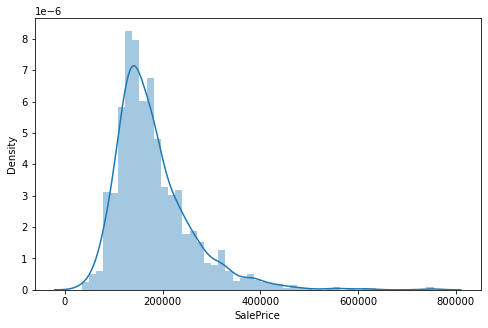

In [7]:
# Histogram
plt.figure(figsize=(8,5))
sns.distplot(train['SalePrice'])

Very interesting, the "SalePrice" variable has a right-skewed distribution. A good way to deal with it is by applying a method to transform it into a normal distribution before starting modeling. There are many methods, and the best one is the one that better transforms into a normal distribution.

![distributions.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*pTFKKfg-Cy1xyBv4oBoWsg.png)

In real life, the major part of the data that you are going to deal with comes with an asymmetric distribution, so learn how to convert it to a normal distribution is an important skill.

Why transform a skewed variable into a more normalized variable? When modeling variables with non-linear relationships or a not-so-linear relationship, the transformation can make these relationships more linear, improving the fit of the model to the data. Furthermore, the shape of the distribution plays a role in determining the appropriate method of statistical analysis; if we're performing a statistical analysis that assumes normality, a transformation might help us meet this assumption.

In [8]:
# Measure the level of asymmetry in SalePrice Data
print("Skew: ", train['SalePrice'].skew())

# Measures the peakness of a frequency distribution
print("Kurtosis: ", train['SalePrice'].kurtosis())

Skew:  1.8828757597682129
Kurtosis:  6.536281860064529


Measures like skewness and kurtosis are used to describe the spread and height of the distribution. The first one measures the lack of symmetry and the other the flatness of the curve.

<AxesSubplot:xlabel='SalePrice'>

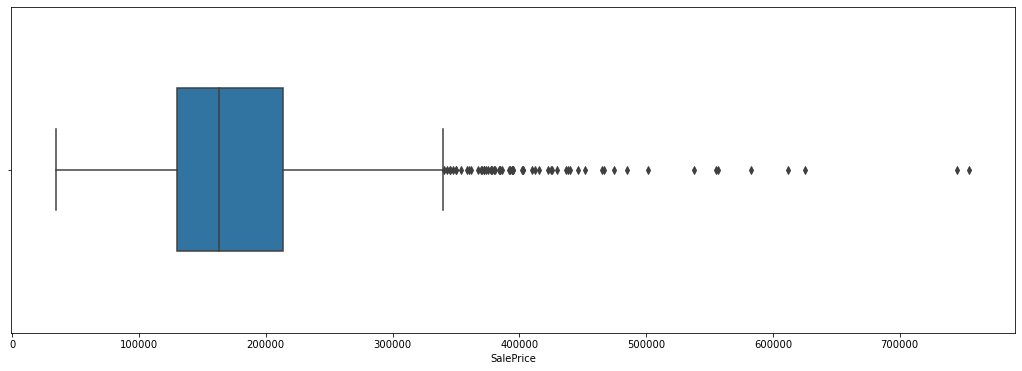

In [9]:
# right skewed distribution
plt.figure(figsize=(18, 6))
sns.boxplot(train['SalePrice'], orient='h', width=0.5)

Another way of looking at the distribution of the data is using the boxplot graph, where we can clearly see that there are many outliers on the right side of the plot.

<a id="missing_values_overview"></a>
## Missing Values Overview

In [10]:
(train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)[:20]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
Id               0.000000
dtype: float64

After seeing the overview of the dataset and the target variable behavior, it's good to get a notion of how many missing values the dataset has.

Sometimes these values are missing not because they weren't collected, but because they mean that the thing doesn't exist. For example, [reading the data description of the dataset](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data), we can see that the variable "Alley" has "Nan" values because some houses don't have alley access. The columns "BsmtQual" and "BsmtCond" happens the same: have missing values not because they are missing, and the fact that these two variables have the same percentage of missing values reinforces the idea that there are some houses without a basement.

![alley.png](https://miro.medium.com/v2/resize:fit:720/format:webp/1*xcSwIdFgl2YIhXBu8UbrvQ.png)

This is why is important to understand the dataset before making a hasty decision of just deleting the null variables or filling it with a random variable.

Therefore, after analyzing the dataset, I concluded that the variables that have more than 80% of missing values will be excluded because they aren't relevant for predicting the target variable.

In [11]:
# Drop columns with too much missing values
# categorical_cols = [col for col in categorical_cols if col not in ['PoolQC', 'MiscFeature', 'Alley', 'Fence']]
train.drop(['PoolQC', 'MiscFeature', 'Alley', 'Fence'], axis=1, inplace=True)

<a id="divide_qualitative_quantitative"></a>
## Divide Qualitative and Quantitative Variables

In [12]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodD

An efficient approach to analyze the variables is by dividing the dataset into categorical variables and numerical variables.

In [13]:
categorical_cols = [col for col in train.columns if train[col].dtype == 'object']
numerical_cols = [col for col in train.columns if train[col].dtype in ('int64', 'float64')]

This way is necessary because the approach used to analyze if a variable is relevant to solving the problem can differ from a categorical variable to a numerical variable.

I decided to first analyze the quantitative variables.

<a id="quantitative"></a>
## Quantitative Analysis

Once we are exploring the data for a linear regression model, we should start looking at the correlation between the variables.

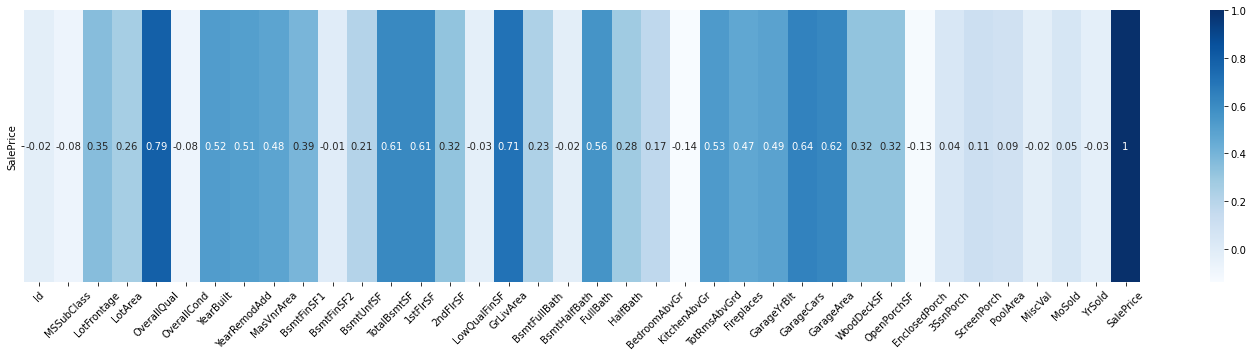

In [14]:
# Data
correlation = train[numerical_cols].corr().round(2)[-1:-2:-1]

# Plot
plt.figure(figsize=(25,5))
sns.heatmap(correlation, annot=True, cmap='Blues')
plt.xticks(rotation=45)
plt.show()

In the image above, we can see the correlation between the dependent variable and the independent variables. Let's see through a scatterplot if we can see a linear relationship between "SalePrice" and the variables that have a high correlation with it.

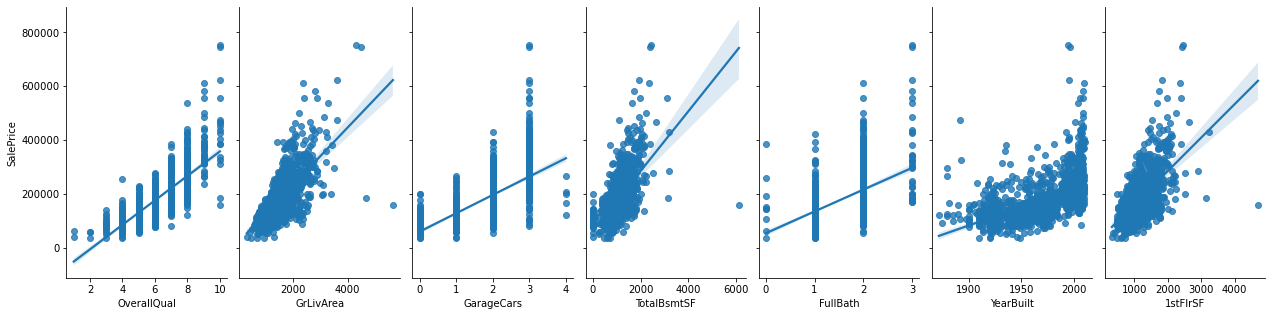

In [15]:
ax = sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']], 
             y_vars=['SalePrice'],
             x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF'],
             height=2.5,
             kind='reg') # 'scatter'
ax.figure.set_size_inches(18, 5)

It's very visible that there are linear relationships. Nevertheless, we can see that there are some subtle outliers that might reduce the effectiveness of the model, so it's better to just remove them.

In [16]:
# Filter out some OutLiers
train = train[train['GrLivArea']<4000]
train = train[train['TotalBsmtSF']<6000]
train = train[train['1stFlrSF']<4000]

Well, now let's just save the name of the columns that we found relevant.

In [17]:
# Relevant Columns
num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']

<a id="qualitative"></a>
## Qualitative Analysis

To do this analysis, I will use a different approach - once dealing with string values are more complicated than numerical values.

First, I would like to introduce two common ways of dealing with categorical values.

<a id="ordinal_encoding"></a>
### Ordinal Encoding

Ordinal encoding assigns each unique value to a different integer.

![18.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*c40wiKwDlLFeJT3hX8v8BQ.png)

This approach assumes an ordering of the categories: "Never" (0) < "Rarely" (1) < "Most days" (2) < "Every day" (3).
 
This assumption makes sense in this example, because there is an indisputable ranking to the categories. Not all categorical variables have a clear ordering in the values, but we refer to those that do as ordinal variables. For tree-based models (like decision trees and random forests), you can expect ordinal encoding to work well with ordinal variables.

<a id="one_hot_encoding"></a>
### One Hot Encoding

One-hot encoding creates new columns indicating the presence (or absence) of each possible value in the original data. To understand this, we'll work through an example.

![19.png](https://miro.medium.com/v2/resize:fit:828/format:webp/1*cnmpSdK-6hAQJdTUBFxcnA.png)

In contrast to ordinal encoding, one-hot encoding does not assume an ordering of the categories. Thus, you can expect this approach to work particularly well if there is no clear ordering in the categorical data (e.g., "Red" is neither more nor less than "Yellow"). We refer to categorical variables without an intrinsic ranking as nominal variables.

One-hot encoding generally does not perform well if the categorical variable takes on a large number of values (you generally won't use it for variables taking more than 15 different values).

When these two approaches appear clear to you, it will be easier to understand what we will do next.


First, let's divide the categorical variables into two groups:

- **Ordinal Encoding Variables**: LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive
- **One Hot Encoding Variables**: Street, LotConfig, RoofStyle, Foundation, Heating, MSSubClass, Neighborhood, Condition1, Condition2, MSZoning, BldgType, HouseStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, BsmtFinType2, Electrical, Functional, GarageType, MiscFeature, SaleType

The next step that we should take is to exclude the variables with high cardinality. When we say cardinality of a variable we are referring to the number of unique entries of a categorical variable as the cardinality of that categorical variable. For instance, the "Street" variable has cardinality 2.

In [18]:
train.Street.unique()

array(['Pave', 'Grvl'], dtype=object)

Besides variables with high cardinality can make the model take too long to train if we use One Hot Encoder, and the variables used can be not significant to the model. In virtue of this, I decided that for variables classified as One Hot Encoding Variables, I will only use relevant columns and the ones with cardinality less or equal to six.

- **One Hot Encoder**: Street, LotConfig, RoofStyle, Foundation, Heating

- **High Cardinality or Irrelevant**: MSSubClass, Neighborhood, Condition1, Condition2, MSZoning, BldgType, HouseStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, BsmtFinType2, Electrical, Functional, GarageType, MiscFeature, SaleType

In [19]:
# One hot encoder
low_cardinality_cols = [col for col in train[['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating']].columns if train[col].nunique() <= 6]
low_cardinality_cols

['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating']

After this filter, the remaining variables that we will apply One Hot Encoder will be these ones: ['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating'].

And I will assign the name of the variables that we will do ordinal encoding to the variable ordinal_cols.

In [20]:
# Ordinal Encoder
cols = 'LotShape, LandContour, Utilities, LandSlope, ExterQual, ExterCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, HeatingQC, KitchenQual, FireplaceQu, GarageFinish, GarageQual, GarageCond, PavedDrive'
ordinal_cols = cols.split(', ')
ordinal_cols

['LotShape',
 'LandContour',
 'Utilities',
 'LandSlope',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive']

The "CentralAir" column is the only categorical variable that is an exception. We won't apply Ordinal Encoding either One Hot Encoder. According to the data description of the competition, this variable only assumes two values.

![24.png](https://miro.medium.com/v2/resize:fit:786/format:webp/1*wSO7Xxnl_fv8X8HfFtPRaw.png)

So later on we will replace the string values by boolean values (Y: 1, N:0).

<a id="prepare_dataset"></a>
## Prepare the Dataset

<a id="transformation"></a>
### Transformation
Do you remember that we saw that the target variable has a right-skewed distribution? We have to take into consideration that maybe the numerical variables chosen by us might have an asymmetric distribution, so let's see what we can find.

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

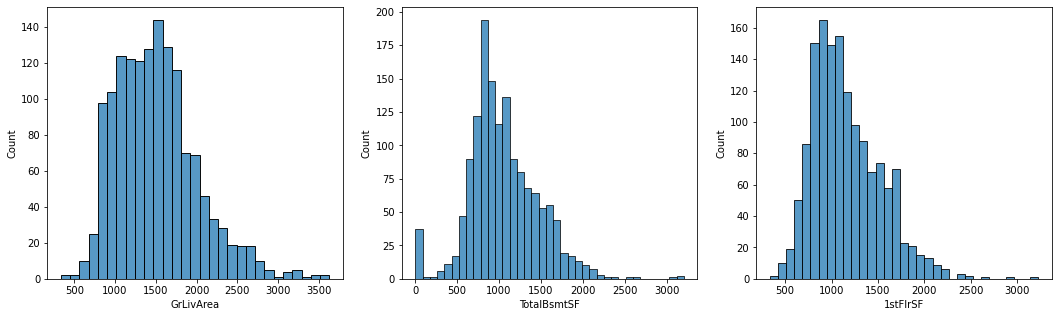

In [21]:
# See if the numerical variables have a normal distribution
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=train['GrLivArea'], ax=ax[0])
sns.histplot(data=train['TotalBsmtSF'], ax=ax[1])
sns.histplot(data=train['1stFlrSF'], ax=ax[2])

It seems that the distribution of the other variables are similar to the target variable. Consequently, we will apply a transformation method to all of them.

In [22]:
# Apply Log Transformation
train['SalePrice'] = np.log(train['SalePrice'])
train['GrLivArea'] = np.log(train['GrLivArea'])
train['1stFlrSF'] = np.log(train['1stFlrSF'])

# Apply Square Root Transformation
train['TotalBsmtSF'] = np.sqrt(train['TotalBsmtSF'])

I made some tests and concluded that the "TotalBsmtSF" variable would be more normally distributed if I apply a square root transformation instead of the common log transformation.

After this, let's see how our data changed.

Skew:  0.06544882031646646
Kurtosis:  0.6664384720246721


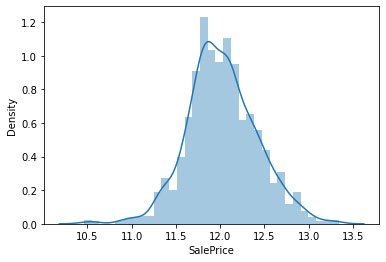

In [23]:
sns.distplot(train['SalePrice'])
print("Skew: ", train['SalePrice'].skew())
print("Kurtosis: ", train['SalePrice'].kurtosis())

The "SalePrice" skew before the transformation was 1.88, now it's 0.12; the kurtosis was 6.54, and now it's 0.81.

<AxesSubplot:xlabel='1stFlrSF', ylabel='Count'>

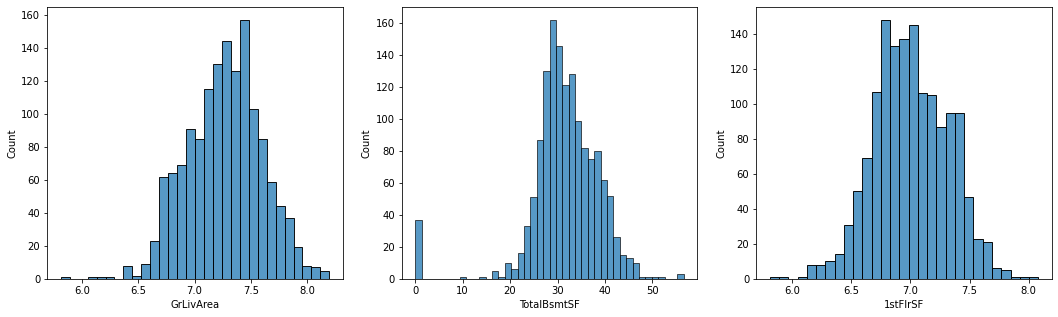

In [24]:
# See if the numerical variables have a normal distribution
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(data=train['GrLivArea'], ax=ax[0])
sns.histplot(data=train['TotalBsmtSF'], ax=ax[1])
sns.histplot(data=train['1stFlrSF'], ax=ax[2])

And the independent variables look much more like a normal distribution than before.

Now let's compare the linear relationship of the variables through a scatterplot before and after the transformation.

#### Before the transformation

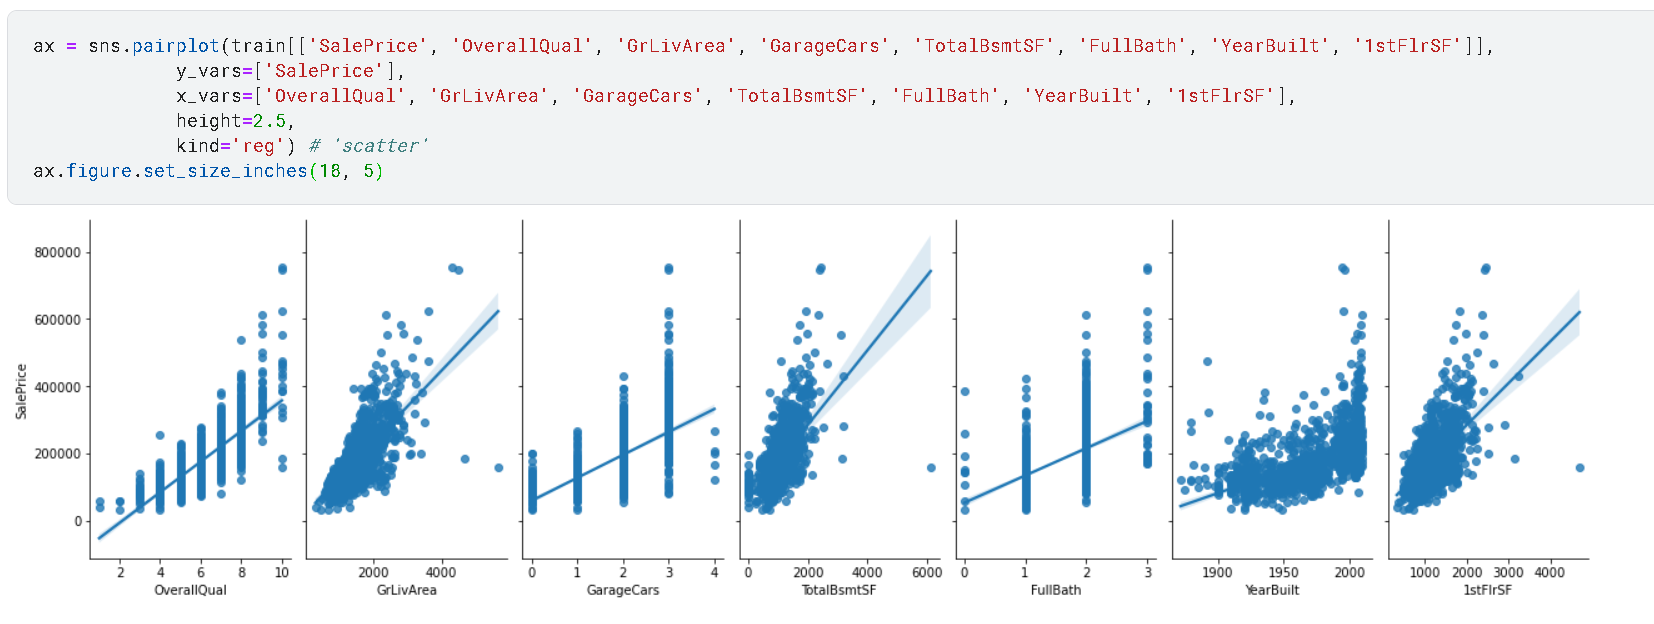

#### After the Transformation

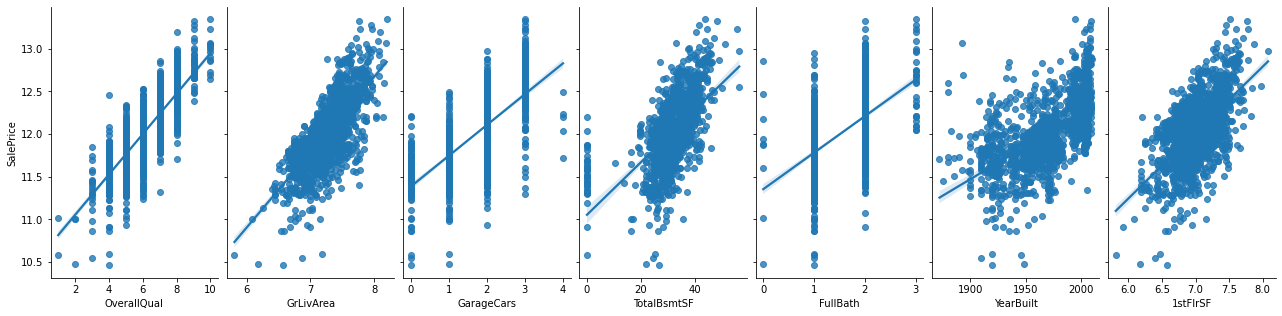

In [25]:
ax = sns.pairplot(train[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF']], 
             y_vars=['SalePrice'],
             x_vars=['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', '1stFlrSF'],
             height=2.5,
             kind='reg') # 'scatter'
ax.figure.set_size_inches(18, 5)

Looking at the variables that we did the transformation, we see that they have a more visible linear relationship. Why this? Because the transformation improved the linearity relationship of the variables.

<a id="conclusion"></a>
## Conclusion

In this article, we understood the difference between a Classification and Regressor model; met the linear regression equation; saw the general characteristics of the dataset and the target variable behavior.

Through this analysis, we concluded that not only the target variable but also some quantitative variables would need a transformation to become normalized variables and learned why to do this.

We also saw the reason why some values are missing, divided the variables between quantitative and qualitative variables, and learned two common approaches to deal with the qualitative variables: Ordinal Encoder and One Hot Encoder.

In the next part of this article, we will start dealing with the missing values; learn how to build and use a Pipeline to preprocess the data; comprehend how works a Linear Regression Model behind the scenes; learn how to statistically analyze the fitting of the model to the data; and will see the most popular regression models.

<a id="part_two"></a>
<h2><b> Part Two </b></h2>

---

#### (Coming soon...)

## Fill Na

In [26]:
# Prepare Train Dataset
missing_cols = (train.isnull().sum() / train.shape[0] * 100).sort_values(ascending=False)[:19].index
missing_ordinal_cols = [col for col in missing_cols if col in ordinal_cols]
missing_ordinal_cols

['FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'BsmtExposure',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1']

In [27]:
# Fill Nan values with "Na"
train[missing_ordinal_cols] = train[missing_ordinal_cols].fillna(value='Na')

In [28]:
# Conver to 1 and 0
train.CentralAir = np.where(train.CentralAir=='Y', 1, 0)
central_air_col = ['CentralAir']

In [29]:
# Prepare the test data

# Fill with central tendency measures
test['TotalBsmtSF'] = test['TotalBsmtSF'].fillna(test['TotalBsmtSF'].mean())
test['Utilities'] = test['Utilities'].fillna(test['Utilities'].mode()[0])
test['KitchenQual'] = test['KitchenQual'].fillna(test['KitchenQual'].mode()[0])
test['GarageCars'] = test['GarageCars'].fillna(test['GarageCars'].mode()[0])

# Fill with "Na"
columns_fill_with_na = ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond']
test[columns_fill_with_na] = test[columns_fill_with_na].fillna('Na')

# Conver to 0 and 1
test.CentralAir = np.where(test.CentralAir=='Y', 1, 0)

In [30]:
# Columns selected
useful_cols = [col for col in train.columns if 
                    col in low_cardinality_cols or 
                    col in ordinal_cols or 
                    col in central_air_col or 
                    col in num_cols]

## Build the Pipeline

![Imgur](https://i.imgur.com/tDMLxup.png)

In [31]:
# Import libs

# Feature Engineer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Pipeline
from sklearn.pipeline import Pipeline

In [32]:
# Select the Columns that we wanna transform and how we will transform them

# Column Transformer
# (name, transformer, columns)

preprocessor = ColumnTransformer(
                [('Ordinal_Encoder', OrdinalEncoder(), ordinal_cols),
                 ('One_Hot_Encoder', OneHotEncoder(handle_unknown='ignore', sparse=False), low_cardinality_cols)]
                 
)

### Pipeline com simple LR

In [33]:
# Model used in Pipeline
from sklearn.linear_model import LinearRegression

# Build the Pipeline
# steps = ('name', 'transform')
pipeline_simple_linear_regression = Pipeline(steps=[('preprocessor', preprocessor), ('lr', LinearRegression())])

# Split the target variable from the dataset
y = train['SalePrice']
X = train[useful_cols]

# Train
pipeline_simple_linear_regression.fit(X, y)

# Prediction
y_pred_lr = pipeline_simple_linear_regression.predict(test[useful_cols])

In [34]:
# Function
def generate_submission(filename, y_predict):
    df = pd.DataFrame({'Id': range(1461,2920), 'SalePrice': y_predict})
    df.to_csv(filename, index=False)
    
    
# Create the file to submit to Kaggle
generate_submission('simple_lr_prediction.csv', y_pred_lr)

In [35]:
# Data
age = np.array([5, 4, 6, 5, 5, 5 ,6, 6 ,2, 7, 7])
price = np.array([85, 103, 70, 82, 89, 98, 66, 95, 169, 70, 48])
data = np.stack((age, price), axis=1)

sample = pd.DataFrame(data=data, columns=['Age (x)', 'Price (y)'])
sample

,Age (x),Price (y)
0,5,85
1,4,103
2,6,70
3,5,82
4,5,89
5,5,98
6,6,66
7,6,95
8,2,169
9,7,70


<AxesSubplot:xlabel='Age (x)', ylabel='Price (y)'>

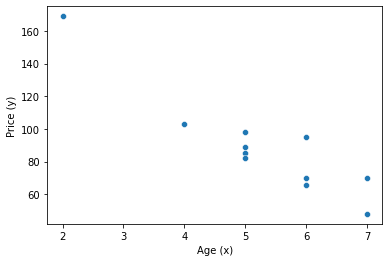

In [36]:
sns.scatterplot(data=sample, x='Age (x)', y='Price (y)')

In [37]:
x = np.array([1, 1, 3, 4])
y = np.array([1, 2, 2, 6])
data2 = np.stack((x, y), axis=1)

sample2 = pd.DataFrame(data=data2, columns=['X', 'Y'])
sample2

,X,Y
0,1,1
1,1,2
2,3,2
3,4,6


### LR com StatsModels

In [38]:
# Prepare the dataset

# Save the index of the datasets to recuperate posteriously
train_idx = train.shape[0]
test_idx = test.shape[0]

# Save id for submission in Kaggle
sale_price_id = test['Id']

# Extract the column Survived from train dataset and delete it
target = np.ravel(np.array(train['SalePrice']).reshape(-1, 1))
train_copy = train.drop(axis=1, columns='SalePrice')

# Concatenate train and test into a single dataframe
df_merged = pd.concat(objs=[train_copy, test]).reset_index(drop=True)

print("df_merged.shape: ({} x {})".format(df_merged.shape[0], df_merged.shape[1]))

df_merged = df_merged[useful_cols]

# Central Air Column
df_merged['CentralAir'] = np.where(df_merged['CentralAir']=='Y', 1, 0)

# One Hot Encoder

# Transform the low cardinality columns into dummies
street_dummies = pd.get_dummies(df_merged['Street'], prefix='Street')
lotconfig_dummies = pd.get_dummies(df_merged['LotConfig'], prefix='LotConfig')
roofstyle_dummies = pd.get_dummies(df_merged['RoofStyle'], prefix='RoofStyle')
foundation_dummies = pd.get_dummies(df_merged['Foundation'], prefix='Foundation')
heating_dummies = pd.get_dummies(df_merged['Heating'], prefix='Heating')

df_merged = pd.concat([df_merged, street_dummies, lotconfig_dummies, roofstyle_dummies, foundation_dummies, heating_dummies], axis=1)

# Drop the old Embarked column
df_merged.drop(axis=1, columns=['Street', 'LotConfig', 'RoofStyle', 'Foundation', 'Heating'], inplace=True)

# Ordinal Encoder

ordinal_encoder = OrdinalEncoder()
df_merged[ordinal_cols] = ordinal_encoder.fit_transform(df_merged[ordinal_cols])

display(df_merged.head())

# Separating df_merged to train and test
X_sm = df_merged.iloc[:train_idx]
test_sm = df_merged.iloc[train_idx:]

df_merged.shape: (2915 x 80)


,LotShape,LandContour,Utilities,LandSlope,OverallQual,YearBuilt,ExterQual,ExterCond,BsmtQual,BsmtCond,...,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Heating_Floor,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall
0,3.0,3.0,0.0,0.0,7,2003,2.0,4.0,2.0,4.0,...,1,0,0,0,0,1,0,0,0,0
1,3.0,3.0,0.0,0.0,6,1976,3.0,4.0,2.0,4.0,...,0,0,0,0,0,1,0,0,0,0
2,0.0,3.0,0.0,0.0,7,2001,2.0,4.0,2.0,4.0,...,1,0,0,0,0,1,0,0,0,0
3,0.0,3.0,0.0,0.0,7,1915,3.0,4.0,4.0,1.0,...,0,0,0,0,0,1,0,0,0,0
4,0.0,3.0,0.0,0.0,8,2000,2.0,4.0,2.0,4.0,...,1,0,0,0,0,1,0,0,0,0


P > |t| under .05 is generally considered significant, .10 mildly significant, and .01 very significant

R-squared: quanto mais proximo de 1 melhor é o ajuste do modelo aos dados

In [39]:
# Libs
import statsmodels.api as sm
import statsmodels.formula.api as smf

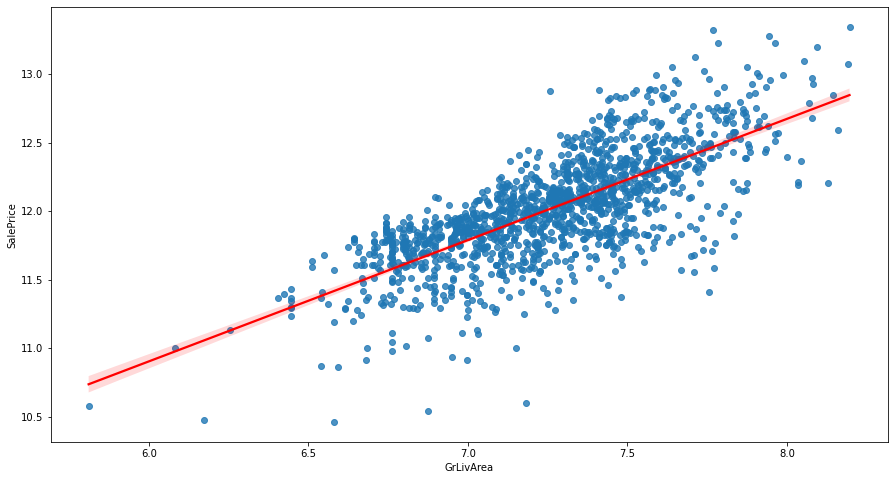

In [40]:
plt.figure(figsize=(15,8))

ax = sns.regplot(x=X_sm['GrLivArea'], y=target, line_kws={'color': 'r'})
ax.set(xlabel='GrLivArea', ylabel='SalePrice') 

plt.show()

In [41]:
# Adjusting the model
model_sm = sm.OLS(target, X_sm).fit()

# Regression Results
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     223.2
Date:                Sat, 25 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:03:16   Log-Likelihood:                 793.14
No. Observations:                1456   AIC:                            -1496.
Df Residuals:                    1411   BIC:                            -1259.
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
LotShape             -0.0098      0.003     -3.276      0.001      -0.016      -0.004
LandContour          -0.0022      0.006     -0.362      0.717      -0.014       0.010
Utilities            -0.2441      0.144     -1.695      0.090      -0.527       0.038
LandSlope             0.0462      0.016      2.885      0.004       0.015       0.078
OverallQual           0.0830      0.005     16.481      0.000       0.073       0.093
YearBuilt             0.0010      0.000      3.513      0.000       0.000       0.002
ExterQual            -0.0045      0.009     -0.529      0.597      -0.021       0.012
ExterCond            -0.0005      0.006     -0.099      0.921      -0.011       0.010
BsmtQual             -0.0110      0.005     -2.421      0.016      -0.020      -0.002
BsmtCond              0.0064      0.004      1.478      0.140      -0.002       0.015
BsmtExposure         -0.0094      0.003     -3.481      0.001      -0.015      -0.004
BsmtFinType1         -0.0161      0.002     -8.730      0.000      -0.020      -0.012
TotalBsmtSF           0.0054      0.001      5.476      0.000       0.003       0.007
HeatingQC            -0.0152      0.003     -5.670      0.000      -0.020      -0.010
CentralAir        -2.271e-14   2.33e-15     -9.725      0.000   -2.73e-14   -1.81e-14
1stFlrSF              0.0772      0.021      3.689      0.000       0.036       0.118
GrLivArea             0.4146      0.020     21.001      0.000       0.376       0.453
FullBath             -0.0040      0.011     -0.385      0.700      -0.025       0.017
KitchenQual          -0.0321      0.006     -5.025      0.000      -0.045      -0.020
FireplaceQu          -0.0061      0.003     -1.780      0.075      -0.013       0.001
GarageFinish         -0.0086      0.004     -2.235      0.026      -0.016      -0.001
GarageCars            0.0589      0.007      7.865      0.000       0.044       0.074
GarageQual           -0.0017      0.006     -0.300      0.764      -0.013       0.010
GarageCond            0.0179      0.006      2.773      0.006       0.005       0.031
PavedDrive            0.0297      0.009      3.252      0.001       0.012       0.048
Street_Grvl           2.3251      0.249      9.348      0.000       1.837       2.813
Street_Pave           2.4805      0.246     10.090      0.000       1.998       2.963
LotConfig_Corner      0.9712      0.099      9.773      0.000       0.776       1.166
LotConfig_CulDSac     1.0194      0.101     10.077      0.000       0.821       1.218
LotConfig_FR2         0.9424      0.101      9.358      0.000       0.745       1.140
LotConfig_FR3         0.9087      0.113      8.036      0.000       0.687       1.130
LotConfig_Inside      0.9638      0.100      9.661      0.000       0.768       1.160
RoofStyle_Flat        0.7744      0.090      8.572      0.000       0.597

In [42]:
# Prediction
y_pred_sm = model_sm.predict(test_sm)

generate_submission('stats_models_prediction.csv', y_pred_sm)

In [43]:
# Organize the P>|t| values into a DataFrame Structure
p_values = pd.DataFrame(model_sm.pvalues, columns=['P>|t|'])

# Select the variables with P>|t| values above 0.05
significant_p_values = p_values[p_values <= 0.05]
significant_p_values.dropna(axis=0, inplace=True)
significant_p_values

,P>|t|
LotShape,1.077974e-03
LandSlope,3.973740e-03
OverallQual,5.977725e-56
YearBuilt,4.573034e-04
BsmtQual,1.561764e-02
BsmtExposure,5.153870e-04
BsmtFinType1,7.058103e-18
TotalBsmtSF,5.151114e-08
HeatingQC,1.734281e-08
CentralAir,1.108482e-21


### 2° Model OLS (Upgraded)

In [44]:
intercept_

NameError: name 'intercept_' is not defined

In [ ]:
# Train the model now improved
model_sm2 = sm.OLS(target, X_sm[significant_p_values.index]).fit()
model_sm2.summary()

In [ ]:
# Prediction
y_pred_sm2 = model_sm2.predict(test_sm[significant_p_values.index])

# Submission
generate_submission('stats_models_prediction2.csv', y_pred_sm2)

# Random Forest Regressor

### Random Forest Regressor with all the variables previously selected

In [ ]:
# Model used in Pipeline
from sklearn.ensemble import RandomForestRegressor

# Build the Pipeline
# steps = ('name', 'transform')
pipeline_random_forest_regressor = Pipeline(steps=[('preprocessor', preprocessor), ('rfr', RandomForestRegressor())])

# Split the target variable from the dataset
y = train['SalePrice']
X = train[useful_cols]

# Train
pipeline_random_forest_regressor.fit(X, y)

# Predict
y_pred_simple_rfr = pipeline_random_forest_regressor.predict(test[useful_cols])

### Random Forest Regressor only with the variables with a P>|t| test lower than 0.05

In [ ]:
# Model
random_forest_regressor = RandomForestRegressor()
random_forest_regressor.fit(X_sm[significant_p_values.index], target)

y_pred_complex_rfr = random_forest_regressor.predict(test_sm[significant_p_values.index])

In [ ]:
# Generate the submission for the two Random Regressor Models
generate_submission('simple_rfr_prediction.csv', y_pred_simple_rfr)
generate_submission('complex_rfr_prediction.csv', y_pred_complex_rfr)

# XGBoost

### XGB Regressor with all the variables previously selected

In [ ]:
# Model used in Pipeline
from xgboost import XGBRegressor

# Build the Pipeline
# steps = ('name', 'transform')
pipeline_xgbregressor = Pipeline(steps=[('preprocessor', preprocessor), ('xgbr', XGBRegressor())])

# Split the target variable from the dataset
y = train['SalePrice']

useful_cols = [col for col in train.columns if 
                    col in low_cardinality_cols or 
                    col in ordinal_cols or 
                    col in central_air_col or 
                    col in num_cols]
X = train[useful_cols]

# Train
pipeline_xgbregressor.fit(X, y)

# Predict
y_pred_simple_xgbr = pipeline_xgbregressor.predict(test[useful_cols])

### XGB Regressor only with the variables with a P>|t| test lower than 0.05

In [ ]:
# Model
xgbregressor = XGBRegressor()
xgbregressor.fit(X_sm[significant_p_values.index], target)

y_pred_complex_xgrb = xgbregressor.predict(test_sm[significant_p_values.index])

In [ ]:
# Generate the submission for the two Extreme Gradient Boost Regressor Models 
generate_submission('simple_xgbr_prediction.csv', y_pred_simple_xgbr)
generate_submission('complex_xgbr_prediction.csv', y_pred_complex_xgrb)